Import necessary packages



In [2]:
%load_ext autoreload
import os
from functools import reduce
import pandas as pd
import matplotlib.pyplot as plt
from VizXpress import heatmap, dott_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
base_dir = '/Users/coltongarelli/Desktop/testing_exprarch'
report_file = 'gseapy.gsea.gene_set.report.csv'

Load GSE9285 data

In [4]:
gse9285_ddssc_dir = base_dir + "/GSE9285/gsea/ddssc/msigdb_hallmarks.gmt"
gse9285_ddssc = pd.read_csv(os.path.join(gse9285_ddssc_dir, report_file), index_col=0)
gse9285_ddssc.index = gse9285_ddssc.index.str.replace('_', ' ')
gse9285_idssc_dir = base_dir + "/GSE9285/gsea/idssc/msigdb_hallmarks.gmt"
gse9285_idssc = pd.read_csv(os.path.join(gse9285_idssc_dir, report_file), index_col=0)
gse9285_idssc.index = gse9285_idssc.index.str.replace('_', ' ')
gse9285_llssc_dir = base_dir + "/GSE9285/gsea/llssc/msigdb_hallmarks.gmt"
gse9285_llssc = pd.read_csv(os.path.join(gse9285_llssc_dir, report_file), index_col=0)
gse9285_llssc.index = gse9285_llssc.index.str.replace('_', ' ')
gse9285_ilssc_dir = base_dir + "/GSE9285/gsea/ilssc/msigdb_hallmarks.gmt"
gse9285_ilssc = pd.read_csv(os.path.join(gse9285_ilssc_dir, report_file), index_col=0)
gse9285_ilssc.index= gse9285_ilssc.index.str.replace('_', ' ')
gse9285_morphea_dir = base_dir + "/GSE9285/gsea/morphea/msigdb_hallmarks.gmt"
gse9285_morphea = pd.read_csv(os.path.join(gse9285_morphea_dir, report_file), index_col=0)
gse9285_morphea.index = gse9285_morphea.index.str.replace('_', ' ')

Load mouse data (GSE71998)

In [5]:
d5_dir = base_dir + '/GSE71998/gsea/day 5'
d5 = pd.read_csv(os.path.join(d5_dir, report_file), index_col=0)
d5.index = d5.index.str.replace("_", " ")
d21_dir = base_dir + '/GSE71998/gsea/day 21'
d21 = pd.read_csv(os.path.join(d21_dir, report_file), index_col=0)
d21.index = d21.index.str.replace("_", " ")


Load our new data

In [6]:
utsw = base_dir + "/UTSW morphea"
morphea_inflam = pd.read_csv(utsw + "/gsea/inflam border/msigdb_hallmarks.gmt/" + report_file, index_col=0)
morphea_inflam.index = morphea_inflam.index.str.replace("_", " ")
morphea_sclerotic = pd.read_csv(utsw + "/gsea/sclerotic/msigdb_hallmarks.gmt/" + report_file, index_col=0)
morphea_sclerotic.index = morphea_sclerotic.index.str.replace("_", " ")

In [26]:
# grouping = {"Mouse vs. LSSc": [d5, d21, gse9285_ilssc, gse9285_llssc],
#             "Mouse vs. DSSc": [d5, d21, gse9285_idssc, gse9285_ddssc],
#             "Mouse vs. Morphea": [d5, d21, morphea_inflam, morphea_sclerotic, gse9285_morphea],
#             "Inflammatory": [d5, morphea_inflam, gse9285_idssc, gse9285_ilssc],
#             "Fibrotic": [d21, morphea_sclerotic, gse9285_ddssc, gse9285_llssc],
#             "Morphea": [d5, morphea_inflam, d21, morphea_sclerotic],
#             'GSE9285': [d5, d21, gse9285_idssc, gse9285_ddssc, gse9285_ilssc, gse9285_llssc, gse9285_morphea]}
grouping = {"Inflammatory": [d5, d21, morphea_inflam, gse9285_idssc, gse9285_ilssc]}

In [28]:
%autoreload 2
# names = [['GSE71998 Day 5 mice', 'GSE71998 Day 21 mice', "GSE9285 iLSSc", "GSE9285 lLSSc"],
#          ['GSE71998 Day 5 mice', 'GSE71998 Day 21 mice', "GSE9285 iDSSc", "GSE9285 dDSSc"],
#          ['GSE71998 Day 5 mice', 'GSE71998 Day 21 mice', "Inflammatory Morphea",
#           "Fibroproliferative Morphea", "GSE9285 Morphea"],
#          ["GSE71998 Day 5 mice", "GSE71998 Day 21 Mice", "Inflammatory Morphea", "Inflammatory DSSc", "Inflammatory LSSc"],
#          ["GSE71998 Day 21 mice", "Fibroproliferative Morphea", "Diffuse DSSc", "Limited LSSc"],
#          ['GSE71998 Day 5 mice',"Inflammatory Morphea", 'GSE71998 Day 21 mice', 
#           "Fibroproliferative Morphea"], ['GSE71998 Day 5 mice', 'GSE71998 Day 21 mice', "Inflammatory dssc", 'diffuse dssc', 'inflammatory lssc',
#           "limited lssc", "Morphea"]
# ]
names = [["GSE71998 Day 5 mice", "GSE71998 Day 21 Mice", "Inflammatory Morphea", "GSE9285 Inflammatory DSSc", "GSE9285 Inflammatory LSSc"]]

count = 0
for k, v in grouping.items():
    save_dir = base_dir + "/dot plot"
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)

    plots = dott_plot.dot_plot(v, names=names[count], title=k)
    form = "pdf"
    plots[0].savefig(os.path.join(save_dir, k + ".{}".format(form)), dpi=400, format=form)
    count += 1
    plt.close()

oops


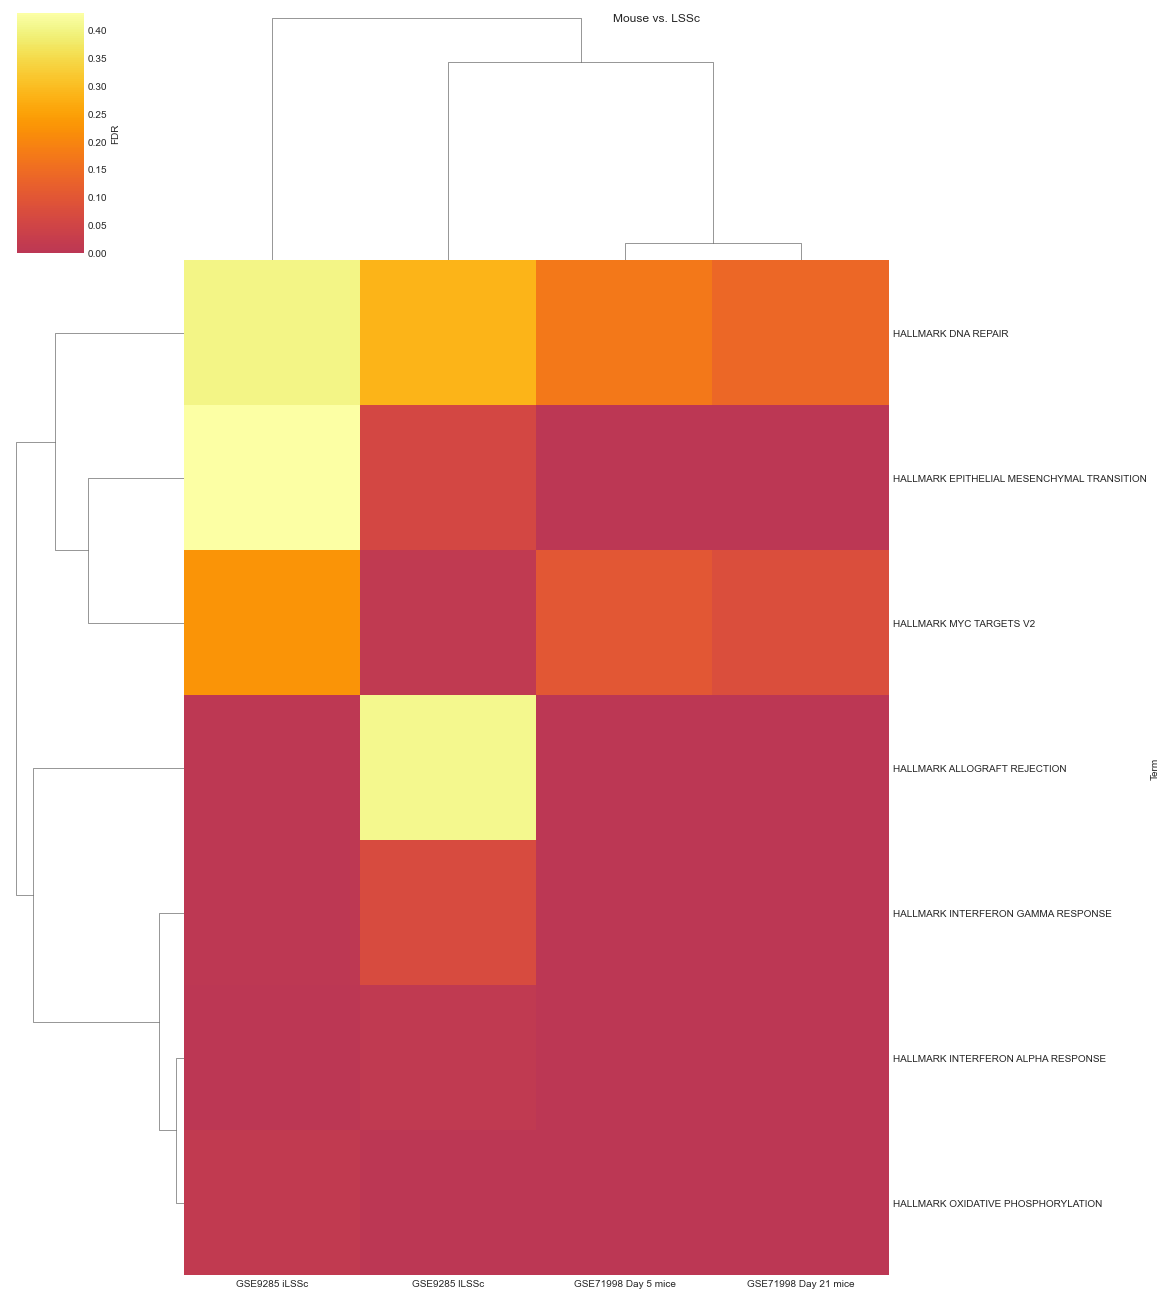

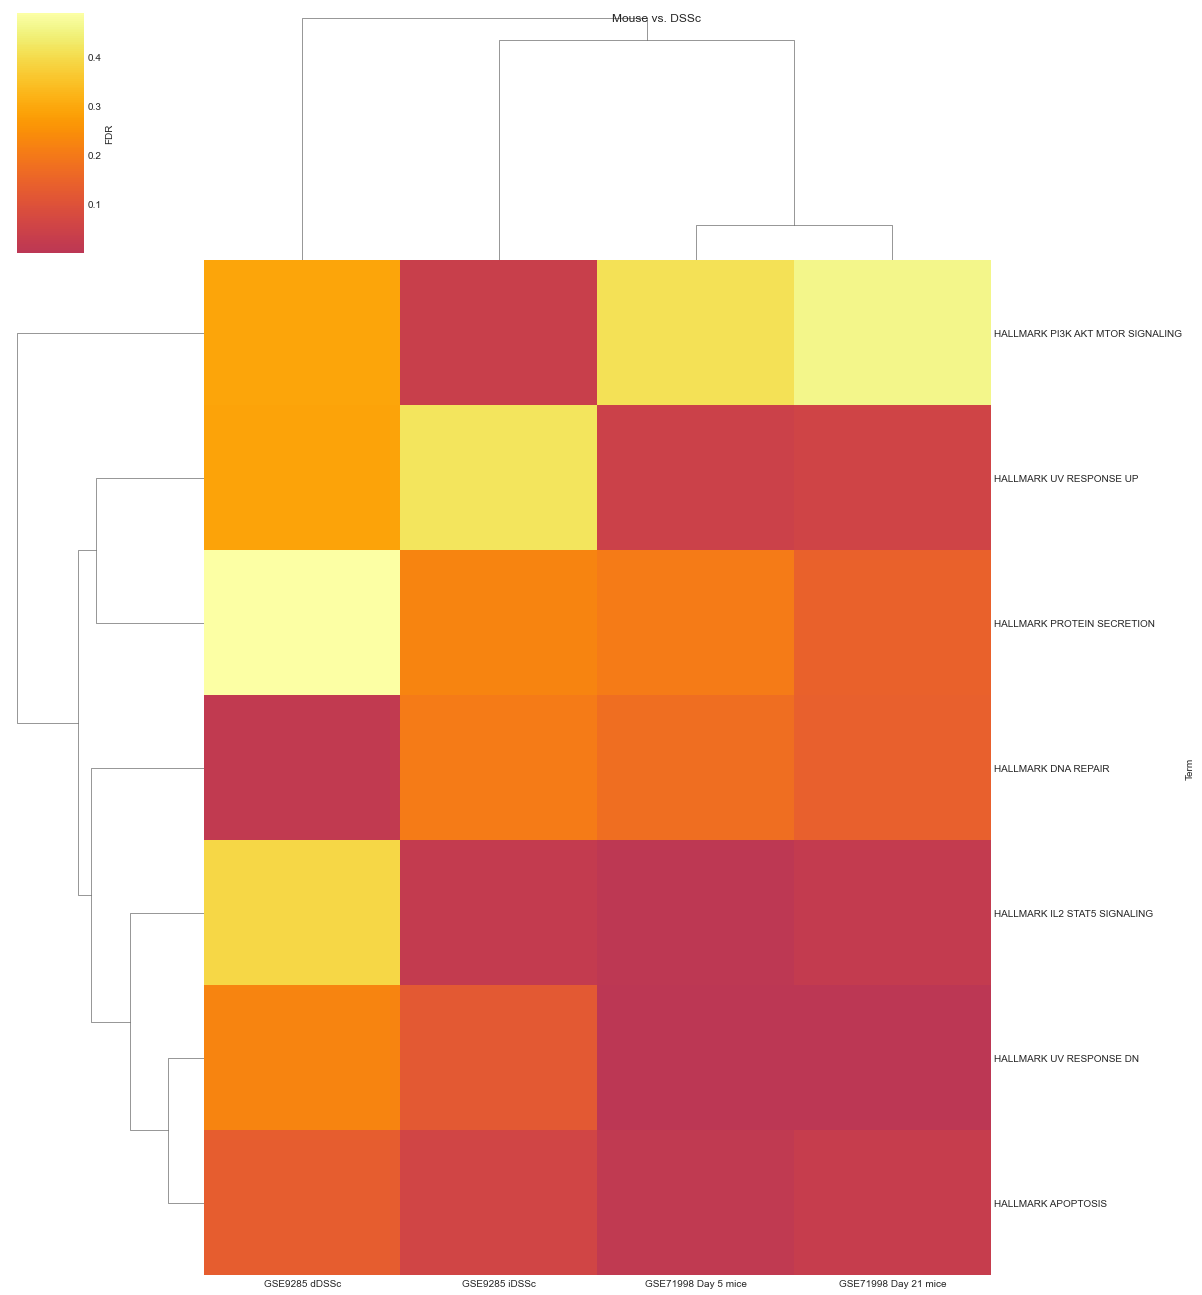

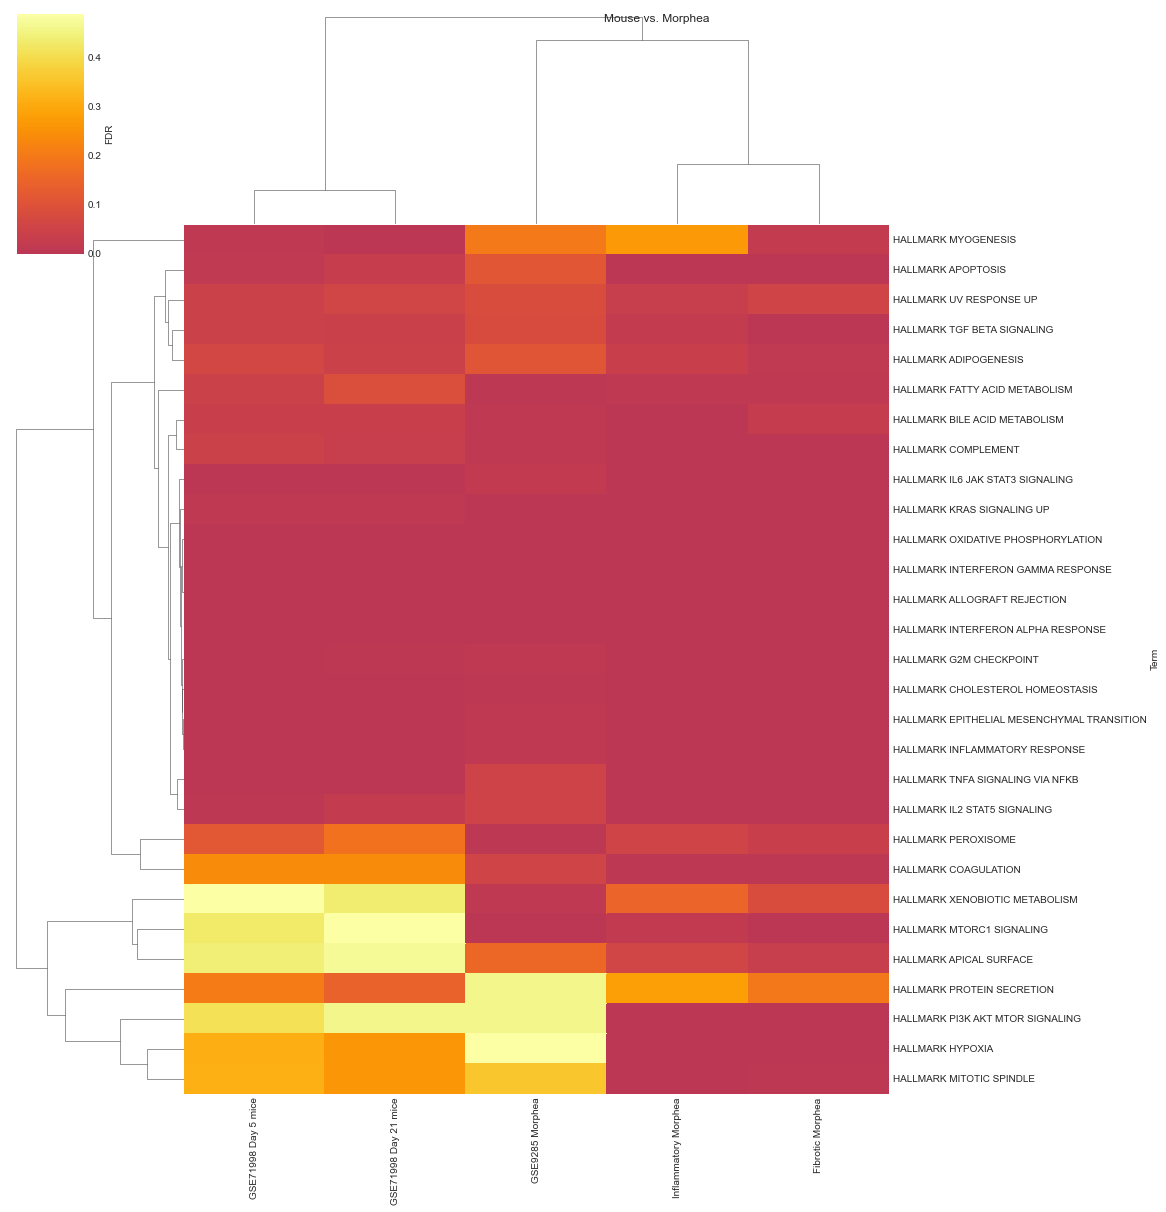

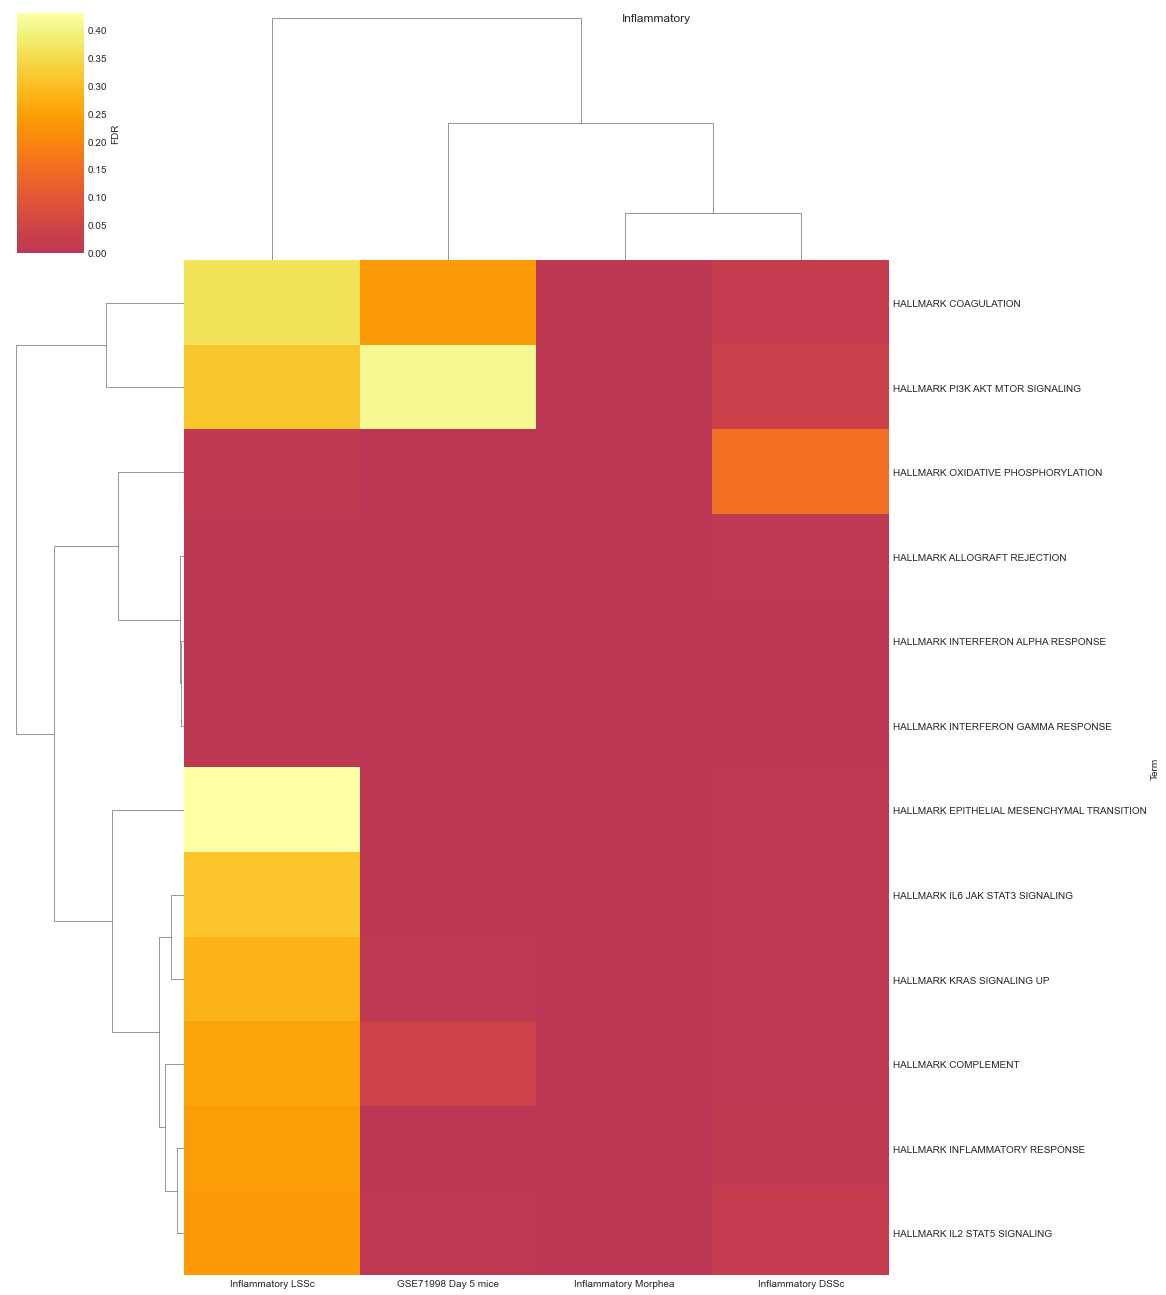

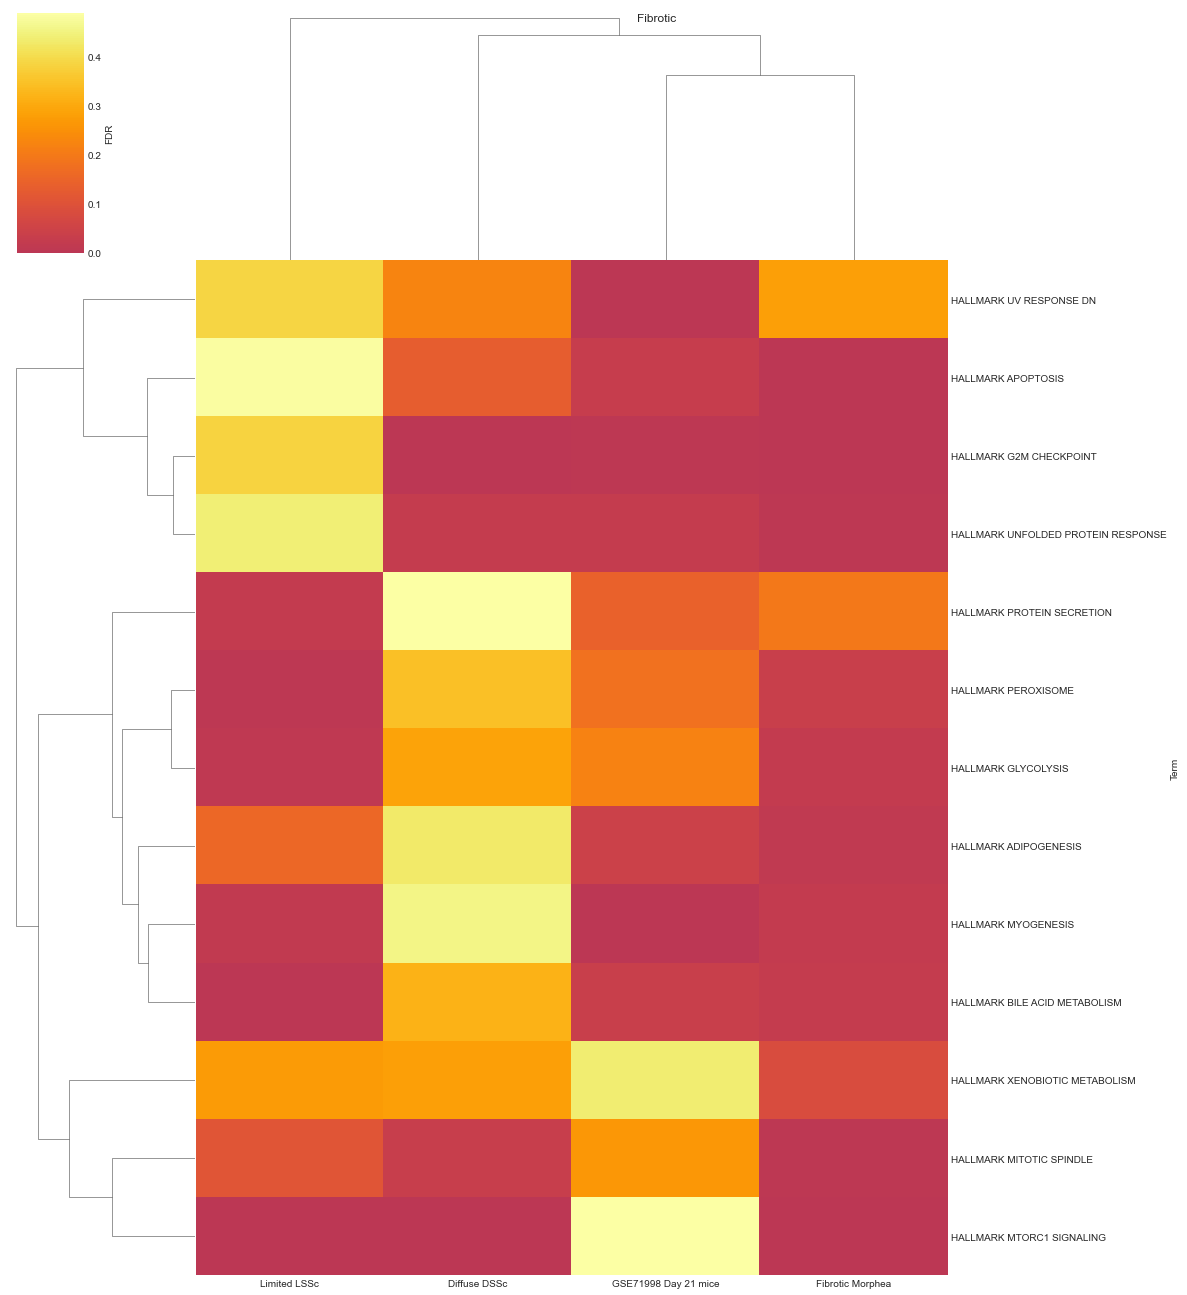

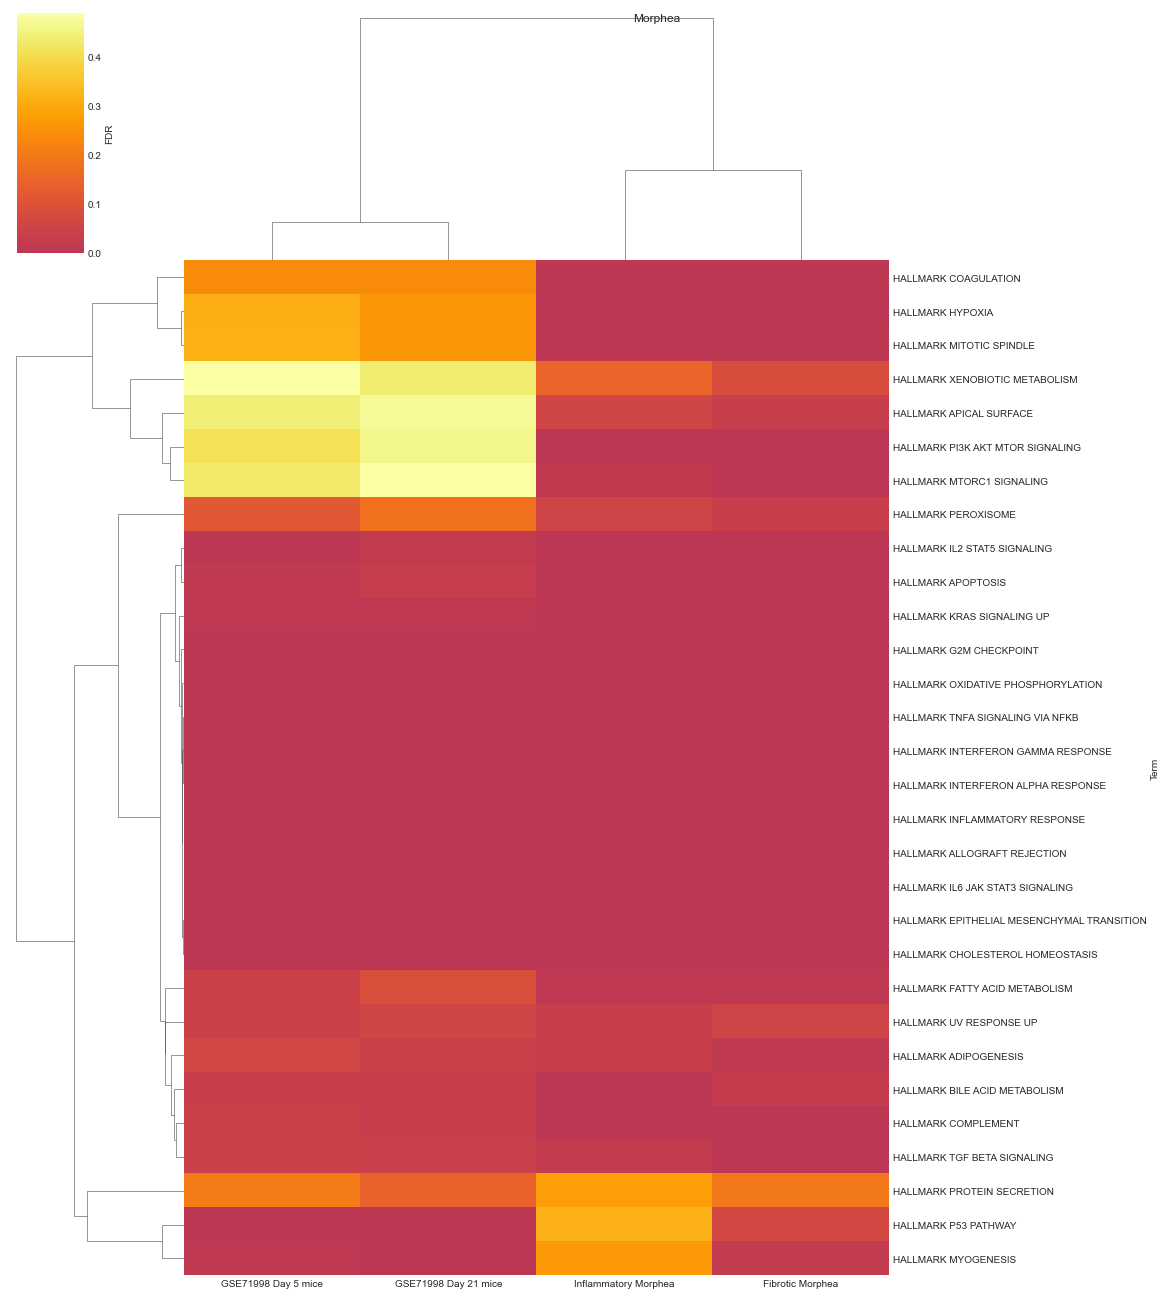

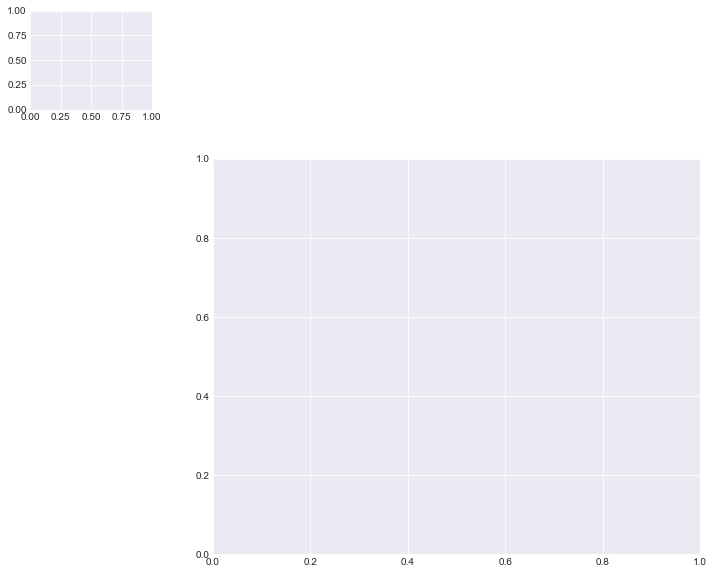

In [25]:
%autoreload 2
count = 0
for k, v in grouping.items():
    save_dir = base_dir + '/heatmaps'
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    working_dfs = [i.loc[i.loc[:,'fdr'] < 0.5, 'fdr'] for i in v]
    grouped = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), working_dfs)
    grouped.columns = names[count]
    try:
        plot = heatmap.sns_clustermap(df=grouped, title=k, save_plot=False, bar_label='FDR',
                                 )
        form = 'pdf'
        plot.savefig(os.path.join(save_dir, k + ".{}".format(form)), dpi=400, format=form)
    except:
        print('oops')
    count += 1

